In [1]:
# This notebook is used to explores the existing clusters within the data

In [39]:
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [22]:
file_path = 'Atts_agroconcept_survey.xlsx'
raw_df = pd.read_excel(file_path)


Index(['id_survey', 'ego_id', 'total_agr_land', 'workforce', 'trees',
       'arable_land', 'ley', 'perm_grass', 'perm_crops', 'prot_cult',
       ...
       'yield_goal', 'income_goal', 'info_gew', 'info_resul', 'interviewtime',
       'co22011', 'co22015', 'co22018', 'reducpercent', 'mainprodcution'],
      dtype='object', length=232)

In [15]:
# Removing the rows containing the NAN values

notnan_df = raw_df[raw_df['id_survey'].notna()]

In [16]:
# Developing clusters of the farmer's based on the farm resources using the following parameters
# total_agr_land, workforce, trees, arable_land, oth_land, animal_unit

cluster_df = notnan_df[['total_agr_land', 'workforce', 'trees', 'arable_land', 'oth_land', 'animal_unit']]

cluster_df

,total_agr_land,workforce,trees,arable_land,oth_land,animal_unit
0,5107,4.11218,59.0,1879.0,575.0,69.3598
1,4424,3.02111,65.0,2813.0,756.0,4.8540
2,6516,4.72324,82.0,3395.0,282.0,84.8934
3,4048,4.21357,80.0,2238.0,302.0,83.3537
4,3834,1.84709,128.0,3212.0,2185.0,0.0000
5,1170,0.59958,43.0,931.0,19.0,0.1400
6,4829,3.32753,105.0,3248.0,358.0,39.0264
7,2180,3.00159,82.0,1226.0,73.0,26.2511
8,3908,1.07840,28.0,3010.0,196.0,0.0000
9,3908,1.07840,28.0,3010.0,196.0,0.0000


In [40]:
tsne = TSNE(n_components=2, verbose=1, random_state=0, n_iter = 2000)

scaler = StandardScaler()
x = scaler.fit_transform(cluster_df)
z = tsne.fit_transform(x) 

[t-SNE] Computing 23 nearest neighbors...
[t-SNE] Indexed 24 samples in 0.000s...
[t-SNE] Computed neighbors for 24 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.773430
[t-SNE] KL divergence after 850 iterations: 0.446871


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\t_sn

[Text(0.5, 1.0, 'T-SNE projectionof farm resources')]

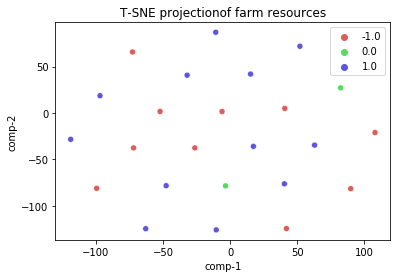

In [41]:
df = pd.DataFrame()
df["y"] = np.sign(notnan_df['reducpercent'])
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="T-SNE projection of farm resources") 

In [ ]:
# Based on t-SNE plots no clustering is observed based on the farm resources